In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix

from scipy.stats import randint as sp_randint

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold

### Importing train and test sets

In [2]:
df = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
df.drop('id', axis=1, inplace=True)
#testData.drop('id', axis=1, inplace=True)

In [4]:
df

gravity    ph  osmo  cond  urea  calc  target
0      1.013  6.19   443  14.8   124  1.45       0
1      1.025  5.40   703  23.6   394  4.18       0
2      1.009  6.13   371  24.5   159  9.04       0
3      1.021  4.91   442  20.8   398  6.63       1
4      1.021  5.53   874  17.8   385  2.21       1
..       ...   ...   ...   ...   ...   ...     ...
409    1.011  5.21   527  21.4    75  1.53       0
410    1.024  5.53   577  19.7   224  0.77       0
411    1.018  6.28   455  22.2   270  7.68       1
412    1.008  7.12   325  12.6    75  1.03       1
413    1.011  6.13   364   9.9   159  0.27       0

[414 rows x 7 columns]

In [5]:
df.isna().sum().sum()

0

## Scaling Data

In [6]:
df_scaled = df.copy()
testData_scaled = testData.copy()

In [7]:
scaler = StandardScaler()

columns_to_scale = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
testData_scaled[columns_to_scale] = scaler.fit_transform(testData[columns_to_scale])

In [8]:
df_scaled

gravity        ph      osmo      cond      urea      calc  target
0   -0.734032  0.365623 -0.889728 -0.884388 -1.134869 -0.829136       0
1    1.065904 -0.865897  0.219521  0.288059  0.846384  0.020338       0
2   -1.334010  0.272090 -1.196904  0.407969 -0.878040  1.532589       0
3    0.465925 -1.629751 -0.893994 -0.084992  0.875736  0.782687       1
4    0.465925 -0.663242  0.949065 -0.484690  0.780342 -0.592652       1
..        ...       ...       ...       ...       ...       ...     ...
409 -1.034021 -1.162085 -0.531355 -0.005053 -1.494430 -0.804243       0
410  0.915909 -0.663242 -0.318038 -0.231548 -0.401072 -1.040727       0
411  0.015941  0.505922 -0.838532  0.101534 -0.063525  1.109408       1
412 -1.484005  1.815386 -1.393156 -1.177500 -1.494430 -0.959824       1
413 -1.034021  0.272090 -1.226768 -1.537228 -0.878040 -1.196308       0

[414 rows x 7 columns]

In [9]:
testData_scaled

id   gravity        ph      osmo      cond      urea      calc
0    414 -0.202805 -1.153899 -1.313470 -1.416467 -0.958051 -0.946130
1    415  0.254749 -0.427877  0.928689  0.970087  0.772576 -0.200085
2    416  0.864821 -0.955893  0.182716 -0.325471  0.542321  2.894380
3    417  0.254749 -1.005394  0.055561  0.465502 -0.215292 -0.200085
4    418 -1.117912 -0.114368 -0.372526  0.970087  1.307362 -0.556889
..   ...       ...       ...       ...       ...       ...       ...
271  685  1.627410  0.545652  0.839681 -0.066359  0.616597  1.048729
272  686 -0.965394 -0.526880 -1.037968 -1.075530 -0.638665 -0.852064
273  687  1.932446 -0.427877  0.928689  0.970087  0.735438  0.134013
274  688  0.102231 -0.774387 -0.474250 -0.066359 -0.824354 -0.790434
275  689 -0.202805  0.413648  0.182716  0.970087 -0.215292 -0.177380

[276 rows x 7 columns]

## Correlation Analysis

<ipython-input-10-70dc8760cc6c>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


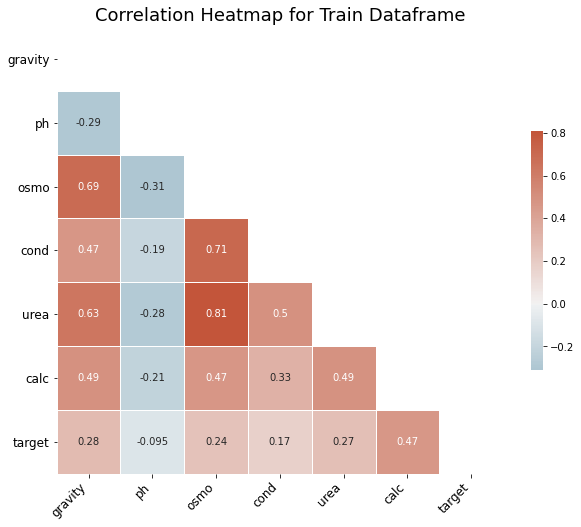

In [10]:
# Calculate the correlation matrix
corr_matrix = df_scaled.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Add a title
ax.set_title('Correlation Heatmap for Train Dataframe', fontsize=18)

# Create a mask for the upper triangle of the heatmap
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Rotate the tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Fix the top and bottom margins
plt.subplots_adjust(top=0.93, bottom=0.1)

# Display the plot
plt.show()

In [11]:
# calculate the correlation matrix using the corr() method
corr_matrix = df_scaled.corr()

# print out the correlation values for each column
for column in corr_matrix.columns:
    print(f"Correlation values for column {column}:")
    print(corr_matrix[column])

Correlation values for column gravity:
gravity    1.000000
ph        -0.290349
osmo       0.692317
cond       0.470433
urea       0.631710
calc       0.494304
target     0.282577
Name: gravity, dtype: float64
Correlation values for column ph:
gravity   -0.290349
ph         1.000000
osmo      -0.309495
cond      -0.190185
urea      -0.279749
calc      -0.214402
target    -0.094983
Name: ph, dtype: float64
Correlation values for column osmo:
gravity    0.692317
ph        -0.309495
osmo       1.000000
cond       0.708480
urea       0.809880
calc       0.472114
target     0.244770
Name: osmo, dtype: float64
Correlation values for column cond:
gravity    0.470433
ph        -0.190185
osmo       0.708480
cond       1.000000
urea       0.499109
calc       0.330609
target     0.172224
Name: cond, dtype: float64
Correlation values for column urea:
gravity    0.631710
ph        -0.279749
osmo       0.809880
cond       0.499109
urea       1.000000
calc       0.489879
target     0.265211
Name: urea

## Train/Test split

In [12]:
# Split the df dataframe into X and y
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Random Forrest

In [13]:
# Create the Random Forest classifier with 100 trees
model1 = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
model1.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model1.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the report
print(report)

Accuracy: 0.7228915662650602
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        45
           1       0.71      0.66      0.68        38

    accuracy                           0.72        83
   macro avg       0.72      0.72      0.72        83
weighted avg       0.72      0.72      0.72        83



### Grid search for optimal hyperparameters

In [14]:
# # Create the Random Forest classifier with 100 trees
# rfc = RandomForestClassifier()

# # Set up parameter ranges to search
# param_dist = {
#     "n_estimators": range(50, 150, 10),
#     "max_features": ["sqrt"],
#     "max_depth": [20, 21, 22, 23, 24, 25],
#     "min_samples_split": [5, 6, 7, None],
#     "min_samples_leaf": [4, 5, 6, None],
#     "bootstrap": [True],
#     "criterion": ["entropy"]
# }

# # Create a GridSearchCV object with 5-fold cross-validation
# rfc_grid = GridSearchCV(rfc, param_grid=param_dist, cv=5, verbose=3, scoring='accuracy')

# # Fit the model to the training data
# rfc_grid.fit(X_train, y_train)

# # Use the trained model to make predictions on the test data
# y_pred = rfc_grid.predict(X_test)

# # Generate a classification report
# report = classification_report(y_test, y_pred)

# # Calculate and print the accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print the best hyperparameters found during the search
# print("\nBest Hyperparameters:\n", rfc_grid.best_params_)

# # Print the classification report
# print("\nClassification Report:\n", report)

In [15]:
# Create the Random Forest classifier with 100 trees
rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=23, max_features='sqrt', min_samples_leaf=5,
                            min_samples_split=6, n_estimators=60)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rfc.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:\n", report)

Accuracy: 0.7590361445783133

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        45
           1       0.74      0.74      0.74        38

    accuracy                           0.76        83
   macro avg       0.76      0.76      0.76        83
weighted avg       0.76      0.76      0.76        83



## Model 2: K-Nearest Neighbhor

In [16]:
# Create a k-Nearest Neighbors classifier with k=5
knn1 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = knn1.predict(X_test)

In [17]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7469879518072289


#### grid search

In [18]:
# Create a kNN classifier
knn = KNeighborsClassifier()

# Set up parameter ranges to search
param_grid = {
    "n_neighbors": range(20, 35, 1),
    "weights": ["distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": range(1, 25, 2),
    "p": range(1, 25, 2)
}

# Create a GridSearchCV object with 5-fold cross-validation
knn_grid = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=4)

# Fit the model to the training data
knn_grid.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = knn_grid.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best hyperparameters found during the search
print("\nBest Hyperparameters:\n", knn_grid.best_params_)

# Print the classification report
print("\nClassification Report:\n", report)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.652 total tim

[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=7, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=21, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbo

[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=22, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n

[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n

[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=24, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=25, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=25, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=25, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neig

[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbo

[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=27, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n

[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=28, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=28, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neigh

[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=30, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbo

[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n

[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=32, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n

[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1, n_neighbors=34, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=1, n_neighbo

[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=20, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n

[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=21, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=21, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=21, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=21, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=22, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=22, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=22, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=22, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=11, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=23, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_nei

[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=21, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=24, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n

[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=26, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbo

[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=27, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n

[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=28, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighb

[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=30, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n

[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=31, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n

[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbo

[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=15, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=3, n_neighbors=34, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=3, n

[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=20, p=23, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n

[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=22, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbo

[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=23, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbo

[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=24, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n

[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=26, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbo

[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=27, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n

[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbo

[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=30, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n

[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=5, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=5, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=32, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbo

[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=15, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=17, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=5, n

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=5, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=20, p=5, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbo

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=7, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=21, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbo

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n

[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=23, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n

[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=25, p=3, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=26, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_n

[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=27, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n

[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=29, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_ne

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=30, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neig

[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=17, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=7, n_neighbors=33, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=7, n

[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=5, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=5, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=20, p=7, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbo

[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=9, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=21, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neigh

[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=22, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n

[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=24, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbo

[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=25, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neigh

[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=26, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n

[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n

[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=29, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_ne

[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=30, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n

[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=32, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n

[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=33, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=33, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=9, n_neighbors=34, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=9, n_neigh

[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=7, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=20, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, 

[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=13, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=21, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_si

[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=17, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=22, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11,

[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=26, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=27, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=29, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, 

[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_siz

[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=31, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=32, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=11, n_neighbors=34, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=11, 

[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=21, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=23, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, 

[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=15, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=24, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=26, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, 

[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=29, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, 

[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=15, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=30, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=5, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=32, p=5, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, 

[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=7, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, 

[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_si

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=17, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=22, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=1, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=23, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15,

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=7, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, 

[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=25, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=26, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=27, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=27, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_siz

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=28, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, 

[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1

[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=15, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=30, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=31, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=31, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=32, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15

[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, 

[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=15, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=15,

[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=20, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=21, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=22, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=22, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=22, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=22, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=23, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=23, p=1, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=

[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=7, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=24, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, 

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=13, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=25, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=26, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=28, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=28, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_siz

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=29, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, 

[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=1

[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=33, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=33, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=33, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=33, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=33, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=34, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=34, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=17, n_neighbors=34, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size

[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=7, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=20, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, 

[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=13, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=21, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=17, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=22, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=23, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=3, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=25, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, 

[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=26, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, 

[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=19, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=27, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=28, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=30, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, 

[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, 

[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=32, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=17, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=33, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=21, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=21, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=19, n_neighbors=34, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, 

[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, 

[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=13, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=23, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=24, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=25, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_s

[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=27, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, 

[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=28, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=2

[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=30, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=31, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=31, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=31, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=31, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=31, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=32, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=32, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=32, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size

[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, 

[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=21, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=21,

[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=20, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=21, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=22, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=22, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=23, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23

[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=24, p=7, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, 

[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=25, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=

[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=26, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=27, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, 

[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=30, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, 

[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=31, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_s

[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=23, n_neighbors=33, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_s

[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=1, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=20, p=3, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=9, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=21, p=13, 

[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=19, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=22, p=1

[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=23, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=23, p=23, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=24, p=3, weig

[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=25, p=9, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=26, p=1

[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=19, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=27, p=2

[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=28, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=29, p=3, weigh

[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=30, p=13

[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1

[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=7, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=33, p=9, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=19, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=19, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=1, n_neighbors=34, p=2

[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=21, p=5, weight

[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=17, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=22, p=1

[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=24, p=5, weight

[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=25, p=1

[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=3, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=27, p=5, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=28, p=1

[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=29, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=29, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=29, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=29, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=30, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=30, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=30, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=30, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=30, p=1, we

[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=31, p=13,

[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=32, p=2

[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=3, n_neighbors=34, p=9, weight

[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=19, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=20, p=2

[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=22, p=11, we

[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=23, p=2

[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=25, p=11, w

[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=26, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=27, p=1

[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=28, p=13, 

[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=29, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=30, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=30, p=1,

[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=31, p=11, we

[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=32, p=2

[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=5, n_neighbors=34, p=7, weight

[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=15, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=17, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=20, p=1

[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=22, p=9, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=23, p=2

[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=25, p=11, wei

[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=26, p=2

[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=28, p=11, w

[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=29, p=2

[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=31, p=11, weig

[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=32, p=1

[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=7, n_neighbors=34, p=5, weight

[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=20, p=1

[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=21, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=21, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=21, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=22, p=3, wei

[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=13, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=23, p=1

[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=24, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=24, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=25, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=25, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=25, p=1, we

[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=26, p=11, we

[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=27, p=1

[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=28, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=28, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=28, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=28, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=29, p=1, we

[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=30, p=1

[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=31, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=32, p=1

[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=9, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=33, p=11, we

[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=19, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=21, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=21, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=9, n_neighbors=34, p=2

[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=21, p

[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=22, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=11, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=24,

[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=25, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=27, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=2

[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=28, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=30, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors

[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=31, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbor

[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=7, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=9, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=33, p

[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=19, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=19, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=21, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=11, n_neighbors=34, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=11, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=9, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=21, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=19, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=24, p=

[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=25, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=27, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=28, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbor

[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=30, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=31, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=33, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=15, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=13, n_neighbors=34, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=13, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=20, p=23, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=21, p

[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=22, p=17, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=24, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=25, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbor

[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=27, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=28, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=30, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=32, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=32, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=32, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=32, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=32, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=33, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=33, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=33, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=3

[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=15, n_neighbors=34

[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=19, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=20, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbor

[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=22, p

[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=5, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=25, p=

[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=26, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=

[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=27, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=29, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=30, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=5, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=5, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=32, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=13, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=33, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=21, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=23, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=17, n_neighbors=34, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=13, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=21, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors

[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=22, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=11, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=24,

[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=25, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbor

[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=27, p=

[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=28, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=30, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=31, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=32, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=33, p

[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=19, n_neighbors=34,

[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=19, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=22, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=25, p=

[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=28, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=29, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=30, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=1, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=31, p

[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=32, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=21, n_neighbors=33, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=21, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=20, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=21, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=23, p=

[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=24, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbor

[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=3, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=26, p=

[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=27, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=29, p=

[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=3

[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=31, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbor

[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=7, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=33, p=

[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=17, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=19, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=23, n_neighbors=34, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=23, n_neighbor

[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=20, p=23, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=22, p=5, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=13, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=23, p=15, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=24, p=19, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=26, p=11, weights=distance;, sco

[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=27, p=17, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=28, p=21, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=30, p=5, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=31, p=11, weights=distance;, scor

[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=32, p=15, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=17, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=1, n_neighbors=33, p=21, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=1, n_neighbors=34, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=1, n_neighbors=34, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=1, n_neighbors=34, p=23, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=1, n_neighbors=34, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=20, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=20, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=20, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=20, p=1, weights=distance;, s

[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=7, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=21, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=22, p=23, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=24, p=3, weights=distance;, score

[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=25, p=11, weights=distance;, sco

[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=15, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=26, p=17, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=27, p=23, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=29, p=11, weights=distance;, 

[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=30, p=23, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=32, p=11, weights=distance;, s

[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=3, n_neighbors=33, p=23, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=20, p=13, weights=distance

[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=21, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=22, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=22, p=1, weights=distance;

[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=11, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=13, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=23, p=13, weights=distance

[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=23, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=25, p=1, weights=distance;

[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=26, p=13, weights=distance

[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=19, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=27, p=21, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=29, p=5, weights=distance;, score

[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=13, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=30, p=13, weights=distance;

[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=31, p=21, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=7, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=33, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=17, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=5, n_neighbors=34, p=19, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=21, p=5, weights=distance;, score

[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=13, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=15, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=22, p=15, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=23, p=23, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=25, p=9, weights=distance;, score

[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=26, p=21, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=7, weights=distance;, score=0.576 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=28, p=11, weights=distance;, sc

[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=29, p=21, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=31, p=9, weights=distance;, score

[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=32, p=21, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=7, n_neighbors=34, p=9, weights=distance;, score

[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=17, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=19, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=20, p=21, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=7, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=9, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=22, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=23, p=23, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=25, p=11, weights=distance;, sco

[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=26, p=21, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=7, weights=distance;, score=0.576 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=28, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=29, p=21, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=31, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=32, p=21, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=9, n_neighbors=34, p=9, weights=distance;, score

[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=17, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=19, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=20, p=21, weight

[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=22, p=7, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=19, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=23, p=19, weight

[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=5, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=25, p=7, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=26, p=21, weight

[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=7, weights=distance;, score=0.576 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=28, p=9, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=29, p=21, weight

[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=5, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=31, p=9, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=32, p=19, weight

[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=11, n_neighbors=34, p=9, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=17, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=19, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=20, p=19, weight

[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=5, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=5, weights=distance;, score=0.758 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=22, p=5, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=13, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=13, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=15, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=23, p=15, weight

[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=24, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=24, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=25, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=25, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=25, p=1, weights=dis

[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=26, p=11, weights=dis

[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=27, p=23, weight

[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=9, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=29, p=11, weights=dis

[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=30, p=23, weight

[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=32, p=11, weights=distan

[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=21, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=13, n_neighbors=33, p=21, weight

[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=7, weights=distance;, score=0.742 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=20, p=9, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=21, p=19, weight

[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=7, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=23, p=9, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=21, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=23, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=24, p=23, weight

[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=26, p=11, weights=di

[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=27, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=28, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=28, p=1, weights=

[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=29, p=13, weight

[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=30, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=31, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=31, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=31, p=1, weights=d

[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=32, p=13, weights=d

[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=15, n_neighbors=33, p=23, weight

[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=13, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=20, p=13, weights

[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=21, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=22, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=22, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=22, p=1, weights=d

[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=3, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=5, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=5, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=23, p=5, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=15, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=15, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=24, p=17, weight

[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=25, p=23, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=1, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=1, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=3, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=3, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=26, p=3, weights=distan

[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=5, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=7, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=7, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=27, p=7, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=28, p=21, weight

[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=7, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=7, weights=distance;, score=0.591 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=30, p=9, weights=distanc

[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=19, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=31, p=19, weight

[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=5, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=5, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=5, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=5, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=7, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=7, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=7, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=7, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=33, p=7, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=17, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=19, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=19, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=19, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=17, n_neighbors=34, p=19, weight

[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=3, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=3, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=21, p=5, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=11, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=13, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=13, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=22, p=13, weights

[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=23, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=23, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=23, p=23, weight

[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=25, p=11, weights=dis

[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=19, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=26, p=23, weight

[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=7, weights=distance;, score=0.576 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=28, p=11, weights=dist

[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=29, p=23, weight

[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=31, p=11, weights=di

[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=21, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=21, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=21, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=23, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=32, p=23, weight

[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=19, n_neighbors=34, p=13, weights=

[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=21, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=23, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=20, p=23, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=21, p=1, weights

[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=11, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=11, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=22, p=11, weights=di

[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=15, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=15, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=17, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=17, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=23, p=17, weight

[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=24, p=23, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=24, p=23, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=24, p=23, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=24, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=24, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=25, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=25, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=25, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=25, p=1, weights=di

[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=9, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=26, p=9, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=11, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=13, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=13, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=27, p=15, weight

[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=19, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=19, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=19, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=19, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=19, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=21, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=21, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=21, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=28, p=21, weight

[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=3, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=3, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=5, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=5, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=5, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=5, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=5, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=30, p=7, weights=distanc

[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=11, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=11, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=11, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=11, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=13, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=13, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=31, p=13, weights

[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=15, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=15, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=32, p=17, weight

[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=1, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=1, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=3, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=21, n_neighbors=34, p=3, weights=distanc

[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=7, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=9, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=11, weights=distance;, score=0.701 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=20, p=11, weights=dista

[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=13, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=15, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=15, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=17, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=17, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=21, p=17, weight

[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=22, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=3, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=3, weights=distance;, score=0.682 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=23, p=3, weights=distan

[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=7, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=7, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=7, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=7, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=9, weights=distance;, score=0.687 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=9, weights=distance;, score=0.727 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=24, p=9, weights=distanc

[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=13, weights=distance;, score=0.652 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=13, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=13, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=15, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=15, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=15, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=25, p=17, weight

[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=26, p=23, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=26, p=23, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=26, p=23, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=1, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=1, weights=distance;, score=0.803 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=1, weights=distance;, score=0.636 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=27, p=3, weights=dist

[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=9, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=9, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=9, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=9, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=11, weights=distance;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=11, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=28, p=11, weights=dis

[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=15, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=15, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=17, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=17, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=17, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=17, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=19, weights=distance;, score=0.731 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=29, p=19, weight

[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=1, weights=distance;, score=0.761 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=1, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=1, weights=distance;, score=0.697 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=1, weights=distance;, score=0.833 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=1, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=3, weights=distance;, score=0.776 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=3, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=3, weights=distance;, score=0.652 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=31, p=3, weights=distanc

[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=9, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=9, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=9, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=9, weights=distance;, score=0.773 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=9, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=11, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=11, weights=distance;, score=0.712 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=11, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=32, p=11, weights=dis

[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=15, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=15, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=17, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=17, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=17, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=17, weights=distance;, score=0.788 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=17, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=19, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=33, p=19, weight

[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=21, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=21, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=21, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=21, weights=distance;, score=0.621 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=23, weights=distance;, score=0.746 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=23, weights=distance;, score=0.697 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=23, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=23, weights=distance;, score=0.758 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=23, n_neighbors=34, p=23, weight

In [19]:
# Create a k-Nearest Neighbors classifier with k=5
knn2 = KNeighborsClassifier(n_neighbors=26, algorithm='ball_tree').fit(X_train, y_train)

y_pred = knn2.predict(X_test)

In [20]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8072289156626506


## Model 3: Logistic Regression

In [21]:
# # Instantiate the Logistic Regression classifier
# log_clf = LogisticRegression()

# # Define the hyperparameter grid for the Logistic Regression
# log_param_grid = {
#     "penalty": ["l1", "l2", "elasticnet", "none"],
#     "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     "solver": ["newton-cg", "lbfgs"],
#     "max_iter": [100000],
# }

# # Create the GridSearchCV object for the Logistic Regression
# log_grid_search = GridSearchCV(log_clf, log_param_grid, cv=5, scoring="accuracy", verbose=3, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# log_grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_log_params = log_grid_search.best_params_

# # Print the best hyperparameters
# print("Best hyperparameters for Logistic Regression:", best_log_params)

In [22]:
# Create the Logistic Regression classifier with the best hyperparameters
best_log_clf = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='newton-cg')

# Fit the Logistic Regression classifier with the best hyperparameters to the training data
best_log_clf.fit(X_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [23]:
y_pred = best_log_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[38  7]
 [11 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.79      0.71      0.75        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83


Accuracy Score:
0.7831325301204819


## Model 4: Gradient Boosting

In [24]:
# # Instantiate the Gradient Boosting classifier
# gb_clf = GradientBoostingClassifier()

# # Define the hyperparameter grid for the Gradient Boosting classifier
# gb_param_grid = {
#     "n_estimators": range(50, 200, 10),
#     "learning_rate": [0.01, 0.1, 1, 10, 100],
#     "max_depth": [3, 4, 5, 6, 7, 8],
#     "min_samples_split": range(2, 20, 4),
#     "min_samples_leaf": range(1, 26, 4),
# }

# # Create the GridSearchCV object for the Gradient Boosting classifier
# gb_grid_search = GridSearchCV(gb_clf, gb_param_grid, cv=5, scoring="accuracy", verbose=3)

# # Fit the GridSearchCV object to the training data
# gb_grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_gb_params = gb_grid_search.best_params_

# # Print the best hyperparameters
# print("Best hyperparameters for Gradient Boosting Classifier:", best_gb_params)

In [25]:
# Instantiate the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, 
                                    min_samples_leaf=17, min_samples_split=2, n_estimators=150).fit(X_train, y_train)

In [26]:
y_pred = gb_clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[37  8]
 [ 8 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        45
           1       0.79      0.79      0.79        38

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.81      0.81      0.81        83


Accuracy Score:
0.8072289156626506


## Model 5: Neural Network

#### nn1

In [27]:
# Define the model
nn1 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='LeakyReLU'),
    layers.Dense(1, activation='sigmoid')
])

nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.001, decay = 0.001)

# Compile the model
nn1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn1.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = nn1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/300
9/9 [==============================] - 1s 39ms/step - loss: 0.6693 - accuracy: 0.6174 - val_loss: 0.6413 - val_accuracy: 0.5821
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6016 - accuracy: 0.7121 - val_loss: 0.6344 - val_accuracy: 0.5821
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5692 - accuracy: 0.7348 - val_loss: 0.6456 - val_accuracy: 0.6269
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7652 - val_loss: 0.6557 - val_accuracy: 0.6269
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5425 - accuracy: 0.7765 - val_loss: 0.6593 - val_accuracy: 0.6567
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 0.5359 - accuracy: 0.7652 - val_loss: 0.6630 - val_accuracy: 0.6418
Epoch 7/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5320 - accuracy: 0.7727 - val_loss: 0.6774 - val_accuracy: 0.6567
Epoch 8/300
9/9 [========

9/9 [==============================] - 0s 10ms/step - loss: 0.2455 - accuracy: 0.9280 - val_loss: 1.1319 - val_accuracy: 0.6418
Epoch 60/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2440 - accuracy: 0.9318 - val_loss: 1.1124 - val_accuracy: 0.6269
Epoch 61/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2370 - accuracy: 0.9356 - val_loss: 1.1841 - val_accuracy: 0.6418
Epoch 62/300
9/9 [==============================] - 0s 10ms/step - loss: 0.2426 - accuracy: 0.9394 - val_loss: 1.1597 - val_accuracy: 0.5821
Epoch 63/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2377 - accuracy: 0.9318 - val_loss: 1.2129 - val_accuracy: 0.7015
Epoch 64/300
9/9 [==============================] - 0s 8ms/step - loss: 0.2285 - accuracy: 0.9356 - val_loss: 1.1900 - val_accuracy: 0.5970
Epoch 65/300
9/9 [==============================] - 0s 9ms/step - loss: 0.2334 - accuracy: 0.9356 - val_loss: 1.1815 - val_accuracy: 0.5821
Epoch 66/300
9/9 [===========

9/9 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9621 - val_loss: 1.7566 - val_accuracy: 0.6418
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1092 - accuracy: 0.9697 - val_loss: 1.7064 - val_accuracy: 0.5970
Epoch 119/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1085 - accuracy: 0.9697 - val_loss: 1.7005 - val_accuracy: 0.6269
Epoch 120/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1042 - accuracy: 0.9659 - val_loss: 1.7124 - val_accuracy: 0.6119
Epoch 121/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1051 - accuracy: 0.9659 - val_loss: 1.7420 - val_accuracy: 0.6418
Epoch 122/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1029 - accuracy: 0.9583 - val_loss: 1.7497 - val_accuracy: 0.6269
Epoch 123/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1064 - accuracy: 0.9621 - val_loss: 1.7680 - val_accuracy: 0.6119
Epoch 124/300
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.0616 - accuracy: 0.9848 - val_loss: 2.1650 - val_accuracy: 0.6269
Epoch 176/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9886 - val_loss: 2.1726 - val_accuracy: 0.6269
Epoch 177/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0620 - accuracy: 0.9811 - val_loss: 2.2291 - val_accuracy: 0.6418
Epoch 178/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0595 - accuracy: 0.9848 - val_loss: 2.2418 - val_accuracy: 0.6119
Epoch 179/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 0.9886 - val_loss: 2.2405 - val_accuracy: 0.5821
Epoch 180/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 2.2624 - val_accuracy: 0.6418
Epoch 181/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0550 - accuracy: 0.9886 - val_loss: 2.2192 - val_accuracy: 0.5970
Epoch 182/300
9/9 [========

9/9 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9962 - val_loss: 2.5709 - val_accuracy: 0.6269
Epoch 234/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0394 - accuracy: 0.9924 - val_loss: 2.5696 - val_accuracy: 0.6418
Epoch 235/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9924 - val_loss: 2.5855 - val_accuracy: 0.6418
Epoch 236/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0373 - accuracy: 0.9924 - val_loss: 2.5933 - val_accuracy: 0.6269
Epoch 237/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9962 - val_loss: 2.5958 - val_accuracy: 0.6269
Epoch 238/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 2.6276 - val_accuracy: 0.6269
Epoch 239/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - accuracy: 0.9962 - val_loss: 2.6306 - val_accuracy: 0.6418
Epoch 240/300
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.0259 - accuracy: 0.9962 - val_loss: 2.8611 - val_accuracy: 0.6269
Epoch 292/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.9962 - val_loss: 2.8882 - val_accuracy: 0.6269
Epoch 293/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0250 - accuracy: 0.9962 - val_loss: 2.8914 - val_accuracy: 0.6269
Epoch 294/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.9962 - val_loss: 2.9176 - val_accuracy: 0.5970
Epoch 295/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9962 - val_loss: 2.9224 - val_accuracy: 0.6119
Epoch 296/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9962 - val_loss: 2.9275 - val_accuracy: 0.5970
Epoch 297/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 0.9962 - val_loss: 2.9003 - val_accuracy: 0.6119
Epoch 298/300
9/9 [========

#### nn2

In [29]:
# Define the model
nn2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(256, activation='relu'),
    Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [30]:
from keras.optimizers import Adam
adam = Adam(learning_rate=1000, decay = 0)

# Compile the model
nn2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn2.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.15, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = nn2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 4947122109546496.0000 - accuracy: 0.4555 - val_loss: 14191542608592896.0000 - val_accuracy: 0.5200
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 3164863.2500 - accuracy: 0.5196 - val_loss: 28370.0781 - val_accuracy: 0.5000
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 672619795841024.0000 - accuracy: 0.5409 - val_loss: 77.5368 - val_accuracy: 0.5200
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 178.2375 - accuracy: 0.5018 - val_loss: 127.0810 - val_accuracy: 0.5200
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 96.1871 - accuracy: 0.5765 - val_loss: 53.3594 - val_accuracy: 0.5000
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 61.7731 - accuracy: 0.5089 - val_loss: 34.5257 - val_accuracy: 0.5000
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 28.7401 - accurac

Epoch 57/100
36/36 [==============================] - 0s 4ms/step - loss: 75.3275 - accuracy: 0.5018 - val_loss: 146.9324 - val_accuracy: 0.5200
Epoch 58/100
36/36 [==============================] - 0s 4ms/step - loss: 113.7632 - accuracy: 0.4947 - val_loss: 38.3950 - val_accuracy: 0.4800
Epoch 59/100
36/36 [==============================] - 0s 4ms/step - loss: 100.8933 - accuracy: 0.4982 - val_loss: 88.9441 - val_accuracy: 0.4800
Epoch 60/100
36/36 [==============================] - 0s 4ms/step - loss: 35.4337 - accuracy: 0.4875 - val_loss: 57.8187 - val_accuracy: 0.5200
Epoch 61/100
36/36 [==============================] - 0s 4ms/step - loss: 92.7817 - accuracy: 0.4840 - val_loss: 6.7126 - val_accuracy: 0.4800
Epoch 62/100
36/36 [==============================] - 0s 4ms/step - loss: 46.0097 - accuracy: 0.5196 - val_loss: 145.6088 - val_accuracy: 0.4800
Epoch 63/100
36/36 [==============================] - 0s 4ms/step - loss: 121.9821 - accuracy: 0.5196 - val_loss: 102.8351 - val_accu

#### nn3

In [31]:
# Define the model
nn3 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.3),
    layers.Dense(448, activation='relu'),
    layers.Dense(448, activation='relu'),
    layers.Dense(576, activation='relu'),
#     Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                448       
                                                                 
 dense_9 (Dense)             (None, 448)               29120     
                                                                 
 dense_10 (Dense)            (None, 448)               201152    
                                                                 
 dense_11 (Dense)            (None, 576)               258624    
                                                                 
 dense_12 (Dense)            (None, 1)                 577       
                                                                 
Total params: 489,921
Trainable params: 489,921
Non-trainable params: 0
_________________________________________________________________


In [32]:
adam = Adam(learning_rate=0.001, decay = 0.01)

# Compile the model
nn3.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.15, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = nn3.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 0.6412 - accuracy: 0.6157 - val_loss: 0.6366 - val_accuracy: 0.6800
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5958 - accuracy: 0.7153 - val_loss: 0.6503 - val_accuracy: 0.6200
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5513 - accuracy: 0.7509 - val_loss: 0.6450 - val_accuracy: 0.6400
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5454 - accuracy: 0.7687 - val_loss: 0.6793 - val_accuracy: 0.6400
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5206 - accuracy: 0.7936 - val_loss: 0.6584 - val_accuracy: 0.6600
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5023 - accuracy: 0.7865 - val_loss: 0.6857 - val_accuracy: 0.6600
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4974 - accuracy: 0.8007 - val_loss: 0.7089 - val_accuracy: 0.6600
Epoch 8/100
9/9 [===

9/9 [==============================] - 0s 10ms/step - loss: 0.0678 - accuracy: 0.9751 - val_loss: 2.0299 - val_accuracy: 0.6000
Epoch 60/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0732 - accuracy: 0.9786 - val_loss: 2.0847 - val_accuracy: 0.6000
Epoch 61/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0723 - accuracy: 0.9715 - val_loss: 2.0229 - val_accuracy: 0.5800
Epoch 62/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0744 - accuracy: 0.9644 - val_loss: 2.0979 - val_accuracy: 0.5800
Epoch 63/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9715 - val_loss: 2.0471 - val_accuracy: 0.6000
Epoch 64/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0600 - accuracy: 0.9751 - val_loss: 2.0843 - val_accuracy: 0.5800
Epoch 65/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0590 - accuracy: 0.9680 - val_loss: 2.1271 - val_accuracy: 0.6000
Epoch 66/100
9/9 [========

#### Cross validating neural networks

In [33]:
# Define the model
nn3 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
    layers.Dense(448, activation='relu'),
    layers.Dense(448, activation='relu'),
    layers.Dense(576, activation='relu'),
#     Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [34]:
# Define the number of folds
k = 5

# Define the cross-validation method
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


# Define the optimizer
adam = Adam(learning_rate=0.0001, decay=0)

# Compile the model
nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Store the initial weights of the model
initial_weights = nn3.get_weights()

# Define a list to store the evaluation results
test_accuracies = []

# Loop over the folds
for train_idx, val_idx in cv.split(X_train, y_train):
    
    # Set the weights of the model to their initial values
    nn3.set_weights(initial_weights)
    
    # Get the training and validation data for this fold
    X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    # Train the model for this fold
    nn3.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)
    
    # Evaluate the model on the test data for this fold
    test_loss, test_accuracy = nn3.evaluate(X_test, y_test)
    
    # Store the test accuracy for this fold
    test_accuracies.append(test_accuracy)

# Compute the mean and standard deviation of the test accuracy
mean_test_accuracy = np.mean(test_accuracies)
std_test_accuracy = np.std(test_accuracies)

# Print the results
print(f"Mean test accuracy: {mean_test_accuracy}")
print(f"Standard deviation of test accuracy: {std_test_accuracy}")


Epoch 1/50
9/9 [==============================] - 1s 28ms/step - loss: 0.6281 - accuracy: 0.6894 - val_loss: 0.6529 - val_accuracy: 0.7015
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5931 - accuracy: 0.7121 - val_loss: 0.5986 - val_accuracy: 0.7313
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5805 - accuracy: 0.7538 - val_loss: 0.5997 - val_accuracy: 0.7612
Epoch 4/50
9/9 [==============================] - 0s 12ms/step - loss: 0.5447 - accuracy: 0.7727 - val_loss: 0.6656 - val_accuracy: 0.7015
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5324 - accuracy: 0.7727 - val_loss: 0.6914 - val_accuracy: 0.7164
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5014 - accuracy: 0.7841 - val_loss: 0.6111 - val_accuracy: 0.7164
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4858 - accuracy: 0.8030 - val_loss: 0.6395 - val_accuracy: 0.6866
Epoch 8/50
9/9 [===========

9/9 [==============================] - 0s 11ms/step - loss: 0.4685 - accuracy: 0.8000 - val_loss: 0.6117 - val_accuracy: 0.6364
Epoch 10/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4509 - accuracy: 0.8113 - val_loss: 0.6376 - val_accuracy: 0.6515
Epoch 11/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4641 - accuracy: 0.8302 - val_loss: 0.6412 - val_accuracy: 0.6212
Epoch 12/50
9/9 [==============================] - 0s 11ms/step - loss: 0.4558 - accuracy: 0.8000 - val_loss: 0.6226 - val_accuracy: 0.5909
Epoch 13/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4145 - accuracy: 0.8453 - val_loss: 0.6841 - val_accuracy: 0.6515
Epoch 14/50
9/9 [==============================] - 0s 10ms/step - loss: 0.4392 - accuracy: 0.8189 - val_loss: 0.7172 - val_accuracy: 0.6667
Epoch 15/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3754 - accuracy: 0.8717 - val_loss: 0.6531 - val_accuracy: 0.6515
Epoch 16/50
9/9 [===============

9/9 [==============================] - 0s 10ms/step - loss: 0.2926 - accuracy: 0.8906 - val_loss: 0.9060 - val_accuracy: 0.6515
Epoch 18/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3274 - accuracy: 0.8792 - val_loss: 0.9790 - val_accuracy: 0.6212
Epoch 19/50
9/9 [==============================] - 0s 10ms/step - loss: 0.2901 - accuracy: 0.8868 - val_loss: 0.9056 - val_accuracy: 0.6515
Epoch 20/50
9/9 [==============================] - 0s 10ms/step - loss: 0.3206 - accuracy: 0.8491 - val_loss: 1.1765 - val_accuracy: 0.6515
Epoch 21/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3140 - accuracy: 0.8792 - val_loss: 1.0532 - val_accuracy: 0.6212
Epoch 22/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3420 - accuracy: 0.8642 - val_loss: 0.9499 - val_accuracy: 0.6061
Epoch 23/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3574 - accuracy: 0.8453 - val_loss: 0.9439 - val_accuracy: 0.6061
Epoch 24/50
9/9 [===============

9/9 [==============================] - 0s 10ms/step - loss: 0.2643 - accuracy: 0.9019 - val_loss: 1.1179 - val_accuracy: 0.6818
Epoch 26/50
9/9 [==============================] - 0s 10ms/step - loss: 0.2585 - accuracy: 0.9132 - val_loss: 1.0123 - val_accuracy: 0.7879
Epoch 27/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2980 - accuracy: 0.8868 - val_loss: 1.1497 - val_accuracy: 0.6818
Epoch 28/50
9/9 [==============================] - 0s 11ms/step - loss: 0.3032 - accuracy: 0.8642 - val_loss: 1.1005 - val_accuracy: 0.7273
Epoch 29/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2455 - accuracy: 0.8906 - val_loss: 1.0638 - val_accuracy: 0.7424
Epoch 30/50
9/9 [==============================] - 0s 11ms/step - loss: 0.2315 - accuracy: 0.9094 - val_loss: 1.1764 - val_accuracy: 0.7121
Epoch 31/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1977 - accuracy: 0.9094 - val_loss: 1.2715 - val_accuracy: 0.7576
Epoch 32/50
9/9 [===============

9/9 [==============================] - 0s 11ms/step - loss: 0.1410 - accuracy: 0.9396 - val_loss: 1.0468 - val_accuracy: 0.6970
Epoch 34/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1369 - accuracy: 0.9585 - val_loss: 1.1191 - val_accuracy: 0.6818
Epoch 35/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1378 - accuracy: 0.9396 - val_loss: 1.0463 - val_accuracy: 0.6818
Epoch 36/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1653 - accuracy: 0.9170 - val_loss: 0.9708 - val_accuracy: 0.7121
Epoch 37/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1698 - accuracy: 0.9170 - val_loss: 1.1382 - val_accuracy: 0.6818
Epoch 38/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1442 - accuracy: 0.9358 - val_loss: 1.1930 - val_accuracy: 0.7273
Epoch 39/50
9/9 [==============================] - 0s 11ms/step - loss: 0.1342 - accuracy: 0.9472 - val_loss: 1.0536 - val_accuracy: 0.6818
Epoch 40/50
9/9 [===============

### Neural Net Optimization

In [35]:
import itertools

tf.random.set_seed(42)

In [36]:
num_layers = 3
min_nodes_per_layer = 64
max_nodes_per_layer = 256
node_step_size = 64

In [37]:
node_options = list(range(
    min_nodes_per_layer,
    max_nodes_per_layer + 1,
    node_step_size
))

node_options

[64, 128, 192, 256]

In [38]:
two_layer_possibilities = [node_options, node_options]
two_layer_possibilities

[[64, 128, 192, 256], [64, 128, 192, 256]]

In [39]:
list(itertools.product(*two_layer_possibilities))

[(64, 64),
 (64, 128),
 (64, 192),
 (64, 256),
 (128, 64),
 (128, 128),
 (128, 192),
 (128, 256),
 (192, 64),
 (192, 128),
 (192, 192),
 (192, 256),
 (256, 64),
 (256, 128),
 (256, 192),
 (256, 256)]

In [40]:
layer_possibilities = [node_options] * num_layers
layer_possibilities

[[64, 128, 192, 256], [64, 128, 192, 256], [64, 128, 192, 256]]

In [41]:
layer_node_permutations = list(itertools.product(*layer_possibilities))
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [42]:
len(layer_node_permutations)

64

In [43]:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    
    print()

64
64
64

64
64
128



In [44]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(6,)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model._name = model_name[:-1]
        
        models.append(model)

In [45]:
models

In [46]:
len(models)

192

In [47]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                448       
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
 dense_20 (Dense)            (None, 64)                128       
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
 dense_22 (Dense)            (None, 64)                128       
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 899
Trainable params: 899
Non

#### Optimization function

In [48]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str='relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''
        
        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'
            
        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
    
    return models

In [49]:
all_models = get_models(
    num_layers = 2,
    min_nodes_per_layer = 64,
    max_nodes_per_layer = 960,
    node_step_size = 128,
    input_shape = (6,)

)

In [50]:
len(all_models)

64

In [51]:
all_models[0].summary()

Model: "dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_402 (Dense)           (None, 64)                448       
                                                                 
 dense_403 (Dense)           (None, 64)                4160      
                                                                 
 dense_404 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [52]:
print(f'# Models = {len(all_models)}')
for model in all_models:
    print(model.name)

# Models = 64
dense64_dense64
dense64_dense192
dense64_dense320
dense64_dense448
dense64_dense576
dense64_dense704
dense64_dense832
dense64_dense960
dense192_dense64
dense192_dense192
dense192_dense320
dense192_dense448
dense192_dense576
dense192_dense704
dense192_dense832
dense192_dense960
dense320_dense64
dense320_dense192
dense320_dense320
dense320_dense448
dense320_dense576
dense320_dense704
dense320_dense832
dense320_dense960
dense448_dense64
dense448_dense192
dense448_dense320
dense448_dense448
dense448_dense576
dense448_dense704
dense448_dense832
dense448_dense960
dense576_dense64
dense576_dense192
dense576_dense320
dense576_dense448
dense576_dense576
dense576_dense704
dense576_dense832
dense576_dense960
dense704_dense64
dense704_dense192
dense704_dense320
dense704_dense448
dense704_dense576
dense704_dense704
dense704_dense832
dense704_dense960
dense832_dense64
dense832_dense192
dense832_dense320
dense832_dense448
dense832_dense576
dense832_dense704
dense832_dense832
dense832_de

#### Training function

In [53]:
def optimize(models: list,
            X_train: np.array,
            y_train: np.array,
            X_test: np.array,
            y_test: np.array,
            epochs: int = 50,
            verbose: int = 0) -> pd.DataFrame:
    
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
        )
        
        model.fit(X_train, y_train, epochs=epochs, verbose=verbose)
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes),
        }
    
    counter = 1
    
    for model in models:
        try:
            print(model.name, end=f' ... {counter}/{len(models)}\n')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        counter = counter + 1
    
    return pd.DataFrame(results)

#### Optimization for 3 layers: 84%

In [54]:
# all_models = get_models(
#     num_layers = 3,
#     min_nodes_per_layer = 64,
#     max_nodes_per_layer = 512,
#     node_step_size = 64,
#     input_shape = (6,)

# )

In [55]:
len(all_models)

64

In [56]:
# %%time

# optimization_results = optimize(
#     models=all_models,
#     X_train=X_train,
#     y_train=y_train,
#     X_test=X_test,
#     y_test=y_test,
# )

In [57]:
# optimization_results.sort_values(by='test_f1', ascending=False).head(20)

#### Optimization for 5 layers

In [58]:
# %%time

# all_models = get_models(
#     num_layers = 4,
#     min_nodes_per_layer = 64,
#     max_nodes_per_layer = 576,
#     node_step_size = 128,
#     input_shape = (6,)
# )

In [59]:
# len(all_models)

In [60]:
# %%time

# optimization_results = optimize(
#     models=all_models,
#     X_train=X_train,
#     y_train=y_train,
#     X_test=X_test,
#     y_test=y_test,
# )

In [61]:
# optimization_results.sort_values(by='test_f1', ascending=False).head(20)

In [62]:
# %%time

# all_models = get_models(
#     num_layers = 5,
#     min_nodes_per_layer = 64,
#     max_nodes_per_layer = 576,
#     node_step_size = 128,
#     input_shape = (6,)
# )

In [63]:
# %%time

# optimization_results2 = optimize(
#     models=all_models,
#     X_train=X_train,
#     y_train=y_train,
#     X_test=X_test,
#     y_test=y_test,
# )

In [64]:
# optimization_results2.sort_values(by='test_f1', ascending=False).head(20)

In [65]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

adam = Adam(learning_rate=0.001, decay = 0.001)

def create_model(optimizer=adam, activation='relu', first_layer_nodes=64, second_layer_nodes=64, third_layer_nodes=128):
    model = Sequential()
    model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(second_layer_nodes, activation=activation))
    model.add(Dense(third_layer_nodes, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [66]:
# model = KerasClassifier(build_fn=create_model)

# # Define the grid search parameters
# param_grid = {
#     'first_layer_nodes': [32, 64, 128],
#     'second_layer_nodes': [32, 64, 128],
#     'third_layer_nodes': [32, 64, 128],
#     'batch_size': [32, 64],
#     'epochs': [150, 300],
#     'optimizer': ['Adam'],
#     'activation': ['relu']
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, verbose=3)
# grid_result = grid.fit(X_train, y_train)

# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


## Model (Last): Voting Classifier

In [67]:


# Create the individual classifiers
log_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
svm_clf = SVC(probability=True, random_state=42).fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
gb_clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
knn_clf = KNeighborsClassifier().fit(X_train, y_train)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[("log", log_clf), ("svm", svm_clf), ("dt", dt_clf), ("rf", rf_clf), ("gb", gb_clf), ("knn", knn_clf)],
    voting="soft",
)

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('log', LogisticRegression(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [68]:
from sklearn.metrics import accuracy_score

# Make predictions with the Voting Classifier and each individual classifier
voting_preds = voting_clf.predict(X_test)
log_preds = log_clf.predict(X_test)
svm_preds = svm_clf.predict(X_test)
dt_preds = dt_clf.predict(X_test)
rf_preds = rf_clf.predict(X_test)
gb_preds = gb_clf.predict(X_test)
knn_preds = knn_clf.predict(X_test)

# Calculate the accuracy scores for the Voting Classifier and each individual classifier
voting_accuracy = accuracy_score(y_test, voting_preds)
log_accuracy = accuracy_score(y_test, log_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Print the accuracy scores
print("Voting Classifier Accuracy:", voting_accuracy)
print("Logistic Regression Accuracy:", log_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("KNN Accuracy:", knn_accuracy)


Voting Classifier Accuracy: 0.7349397590361446
Logistic Regression Accuracy: 0.7831325301204819
SVM Accuracy: 0.7710843373493976
Decision Tree Accuracy: 0.6385542168674698
Random Forest Accuracy: 0.7228915662650602
Gradient Boosting Accuracy: 0.8072289156626506
KNN Accuracy: 0.7469879518072289


In [69]:
# Create a new Random Forest classifier with the best hyperparameters from grid search before
best_rf_clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=6, max_features='sqrt', min_samples_leaf=2,
                            min_samples_split=3, n_estimators=100)


In [105]:
# Instantiate the classifiers
log_clf = LogisticRegression(C=0.001, max_iter=1000, penalty='l2', solver='newton-cg')

gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, 
                                    min_samples_leaf=17, min_samples_split=2, n_estimators=150)
# best_rf_clf = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=23, 
#                                      max_features='sqrt', min_samples_leaf=5, min_samples_split=6, n_estimators=60)
# svm_clf = SVC(C=0.1, kernel='poly', gamma=0.1, shrinking=False, probability=True)
knn = KNeighborsClassifier(n_neighbors=26, algorithm='ball_tree')

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[("log", log_clf), ("gb", gb_clf), ('knn', knn)],
    voting="soft",
)

# Fit the Voting Classifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions with the Voting Classifier
voting_preds = voting_clf.predict(X_test)

# Evaluate the performance
voting_accuracy = accuracy_score(y_test, voting_preds)
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.8072289156626506


In [123]:
submitPreds = voting_clf.predict(testData_scaled.drop('id', axis=1))

In [124]:
submitPreds

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [125]:
submitPreds = pd.DataFrame(submitPreds, columns=['target'])

In [126]:
submitPreds

target
0         0
1         1
2         1
3         0
4         0
..      ...
271       1
272       0
273       1
274       0
275       0

[276 rows x 1 columns]

In [127]:
# concatenating correct ids to predictions
submission = pd.concat([testData['id'], submitPreds], axis=1)

In [128]:
submission

id  target
0    414       0
1    415       1
2    416       1
3    417       0
4    418       0
..   ...     ...
271  685       1
272  686       0
273  687       1
274  688       0
275  689       0

[276 rows x 2 columns]

In [129]:
submission.to_csv('submission1.csv', index=False)

### Neural Network included in the voting classifier

In [ ]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_fn):
        self.model_fn = model_fn
        self.model = None

    def fit(self, X, y, **kwargs):
        self.model = self.model_fn()
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        proba = self.model.predict(X)
        return np.concatenate([1 - proba, proba], axis=1)

# Instantiate the KerasClassifierWrapper with the model-building function
nn_clf = KerasClassifierWrapper(create_nn_model)

# Train the neural network model
nn_clf.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Use the KerasClassifierWrapper in a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ("log_clf", log_clf),
        ("gb_clf", gb_clf),
        ("rf_clf", rf_clf),
        ("nn_clf", nn_clf),
    ],
    voting="soft",
)

# Fit the VotingClassifier to the training data
voting_clf.fit(X_train, y_train)

# Evaluate the VotingClassifier on the test data
voting_score = voting_clf.score(X_test, y_test)
print("Voting Classifier Test Accuracy:", voting_score)


In [ ]:
# Create a Random Forest classifier
rfc = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=6, max_features='sqrt', min_samples_leaf=2,
                            min_samples_split=3, n_estimators=100)

# Create a Support Vector Machine classifier with a linear kernel
svm = SVC(kernel='rbf', probability=True)

# Create a k-Nearest Neighbors classifier with k=5
knn = KNeighborsClassifier(n_neighbors=26)

# Create a voting classifier with the three classifiers
voting_clf = VotingClassifier(estimators=[('rfc', rfc), ('svm', svm), ('knn', knn)], voting='soft')

# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:\n", report)